In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#create noisy nonlinear data
np.random.seed(0)

X = np.linspace(0, 1, 200)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.2, 200)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)

In [71]:
#let's define a powerful overkill model
model = nn.Sequential(
    nn.Linear(1, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

#fix 1: smaller model
model_small = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

#possible fixes
fix1 = False
fix2 = False
fixboth = True

In [73]:
#define loss and optimizing functions
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
mod = model
opt = optimizer 

#modifying optimzer for possible fixes
if fix1: 
    mod = model_small
    opt = optim.Adam(model_small.parameters(), lr=0.01)
elif fix2:
    mod = model
    opt = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)
elif fixboth:
    mod = model_small
    opt = optim.Adam(model_small.parameters(), lr=0.01, weight_decay=1e-3)

In [75]:
#training loop
epochs = 300
train_losses = []
val_losses = []

for epoch in range(epochs):
    
    # --- Training ---
    mod.train()
    y_pred = mod(X_train)
    train_loss = criterion(y_pred, y_train)

    opt.zero_grad()
    train_loss.backward()
    opt.step()

    # --- Validation ---
    mod.eval()
    with torch.no_grad():
        y_val_pred = mod(X_val)
        val_loss = criterion(y_val_pred, y_val)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

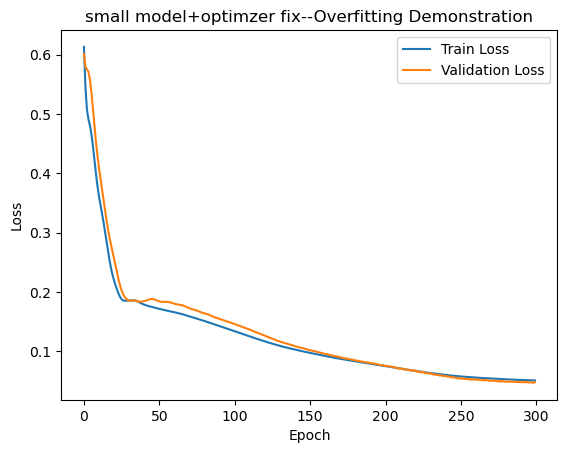

In [77]:
#plot loss curves
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Overfitting Demonstration")
if fix1:
    plt.title("small model fix--Overfitting Demonstration")
elif fix2:
    plt.title("optimizer fix--Overfitting Demonstration")
elif fixboth:
    plt.title("small model+optimzer fix--Overfitting Demonstration")
plt.show()

# Overfitting & Generalization in Neural Networks

## Objective
This notebook explores **overfitting behavior** in neural networks and demonstrates practical mitigation strategies:

- Reducing model capacity  
- Adjusting optimization strategy  
- Comparing training vs validation loss  

---

## Key Concepts

**Overfitting**  
Overfitting occurs when a model learns the training data too well, capturing noise and dataset-specific fluctuations instead of generalizable patterns.

**Generalization**  
Generalization refers to a model’s ability to perform well on unseen data.

**Training Loss vs Validation Loss**

- **Training Loss ↓** → Model fitting known data  
- **Validation Loss ↓** → Model generalizing  
- **Training ↓ + Validation ↑ / plateau** → Overfitting  

---

## Baseline: High-Capacity Model

The initial network uses a relatively **large architecture** (higher parameter count).

**Observation:**
- Training loss decreases steadily  
- Validation loss plateaus / fluctuates  
- A gap emerges between curves  

**Interpretation:**  
The model begins memorizing training-specific noise.

---

## Fix 1: Smaller Model (Reduced Capacity)

We reduce hidden layer size / depth.

**Observation:**
- Training loss decreases more gradually  
- Validation loss tracks training loss closely  
- Reduced generalization gap  

**Interpretation:**  
Lower-capacity models are less prone to memorization.

---

## Fix 2: Optimizer Adjustment

We modify the optimizer / learning dynamics.

**Observation:**
- Training becomes more stable  
- Validation fluctuations decrease  

**Interpretation:**  
Optimization strategy affects convergence stability, but does not alone guarantee improved generalization.

---

## Combined Fix: Smaller Model + Optimizer

**Observation:**
- Training & validation loss decrease smoothly  
- Minimal gap between curves  
- Stable convergence  

**Interpretation:**  
Generalization improves when **model capacity and optimization** are jointly tuned.

---

## Key Takeaways

-- Overfitting appears as a widening **train–validation loss gap**  
-- Larger models overfit more easily on limited datasets  
-- Reducing model capacity acts as implicit regularization  
-- Optimizers influence stability and convergence dynamics  
-- Best results typically require **combined adjustments**

---

## Practical Lessons for Applied ML

In real-world ML systems:

- Bigger models are not always better  
- Validation metrics must be monitored continuously  
- Capacity, optimizer, learning rate, and regularization must be tuned together  
- Stable generalization is more valuable than lowest training loss  